### 랭그래프 설치하기

In [1]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### GPT 모델 설정하기

In [2]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")

# 모델 초기화
model = ChatOpenAI(model="gpt-4o-mini", api_key=api_key)
model.invoke("안녕하세요")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CBPAHrHxXqZeBhKA6lwTO2BowE8wW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--27b9cfbb-819f-4b19-8b9b-bcd808f96779-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### 상태 정의하기

In [12]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypeDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]): 메세지들은 "list" 타입을 가집니다.
        'add_messages' 함수는 이 상태 키가 어떻게 업데이트 되어야 하는지를 정의합니다.
        (이 경우, 메세지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]

# StateGraph 클래스를 사용하여 State 타입의 그래프 생성
graph_builder = StateGraph(State)

### 노드 생성하기

In [13]:
def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리
        형식은 {"messages": [응답 메시지]} 입니다.
    """
    return {"messages": [model.invoke(state["messages"])]}

graph_builder.add_node("generate", generate)

### graph 선언하기

In [14]:
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

### 그래프 도식화하기

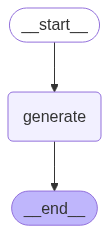

In [15]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

### 리스트에 문장 추가하기

In [16]:
response = graph.invoke({"messages": ["안녕하세요! 저는 이시현입니다."]})

print(type(response))
response

<class 'dict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 이시현입니다.', additional_kwargs={}, response_metadata={}, id='50ccbf2f-98c6-430c-a7a3-08756897ee57'),
  AIMessage(content='안녕하세요, 이시현님! 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CBPP7DPhIcEXBNA39xPtYOc6StXa1', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c5d89b54-f5d3-4204-9c5e-8bb531376764-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

### 이전 대화 내용에 새 메시지 추가하기

In [17]:
response["messages"].append("제 이름을 아시나요?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 이시현입니다.', additional_kwargs={}, response_metadata={}, id='50ccbf2f-98c6-430c-a7a3-08756897ee57'),
  AIMessage(content='안녕하세요, 이시현님! 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CBPP7DPhIcEXBNA39xPtYOc6StXa1', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c5d89b54-f5d3-4204-9c5e-8bb531376764-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content

### 스트림 방식으로 출력하기

In [19]:
inputs = {"messages": [("human", "한국과 일본의 관계에 대해 자세히 알려 줘.")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content, end="")

한국과 일본의 관계는 역사적으로 복잡하고, 여러 차원에서 변화해 왔습니다. 이 두 나라의 관계는 정치적, 경제적, 문화적 측면에서 여러 가지 논쟁과 협력 사례가 혼재해 있습니다. 다음은 한국과 일본 관계의 주요 사항입니다.

### 1. 역사적 배경
- **일제강점기**: 1910년부터 1945년까지 한국은 일본의 식민 지배를 받았습니다. 이 기간 동안 많은 한국인들이 고통을 겪었고, 강제 징용, 일본군 위안부 문제 등 여러 인권 유린 사건이 발생했습니다.
- **해방 이후**: 1945년 제2차 세계대전의 종전과 함께 한국은 해방되었으나, 역사 문제는 여전히 양국 간의 갈등의 주요 요인이 되고 있습니다.

### 2. 정치적 관계
- **위안부 문제**: 일본군 위안부 문제는 두 나라 간의 감정적 불화를 심화시키는 큰 이슈입니다. 한국은 일본 정부의 공식적 사과와 법적 배상을 요구하고 있습니다.
- **독도/다케시마 문제**: 독도는 한국이 실효 지배하고 있는 섬이지만, 일본은 "다케시마"라고 부르며 sovereignty를 주장하고 있습니다. 이로 인해 양국 간의 영토 갈등이 존재합니다.
- **역사 교과서**: 일본의 역사 교과서에서 일제 강점기에 대한 서술 방식이 한국과의 갈등을 일으키기도 합니다. 한국은 일본의 역사를 미화하거나 왜곡했다고 주장하고 있습니다.

### 3. 경제적 관계
- **무역**: 한국과 일본은 서로 중요한 무역 파트너입니다. 일본은 한국의 주요 수출국 중 하나이며, 반도체, 자동차 부품 등에서 협력이 이루어지고 있습니다.
- **수출 규제**: 2019년 일본이 한국에 대한 반도체 관련 품목의 수출 규제를 강화한 사건은 두 국가 간의 경제적 긴장을 더욱 심화시켰습니다. 이는 한국의 경제에 큰 영향을 미쳤으며, 양국 간의 경제적 관계에 심각한 타격을 주었습니다.

### 4. 문화적 관계
- **K-POP과 일본의 J-POP**: 한국의 대중문화가 일본에서 큰 인기를 얻으며 양국 간의 문화교류가 활발해졌습니다. K-POP 아티스트들